In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns
sns.set_style('darkgrid')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# Loading the data
df = pd.read_csv(r"C:\Users\yashv\Desktop\DS Assignment\Project 01\Gold_data.csv",encoding='latin1')

df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


# EDA

In [3]:
# looking for the shape of the data
df.shape

(2182, 2)

In [4]:
# We can see we have 6 years of data

In [5]:
# checking the Descriptive Satats
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [6]:
# here we observe min, max, stdv ,%tile of the price column
# price range is between 2252 to 4966
# by looking towards 75% & max we can say no outlier is there

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [8]:
# converting dtype of date object to datetime
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.isna().sum()

date     0
price    0
dtype: int64

In [10]:
# the observation is there is [no] not null value,
# target column data type is float.


# Outlier Detection

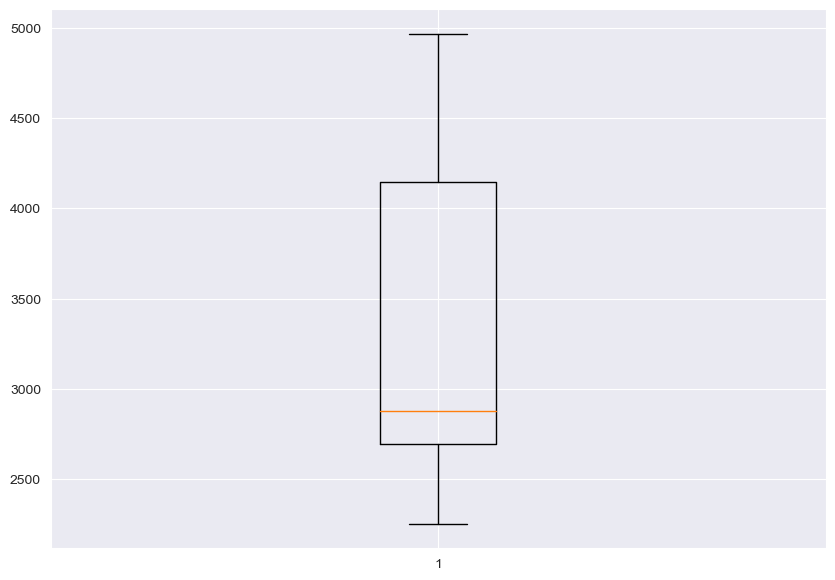

In [11]:
plt.boxplot(df['price'])
plt.rcParams['figure.figsize'] = (10,7)

# Checking Trend 

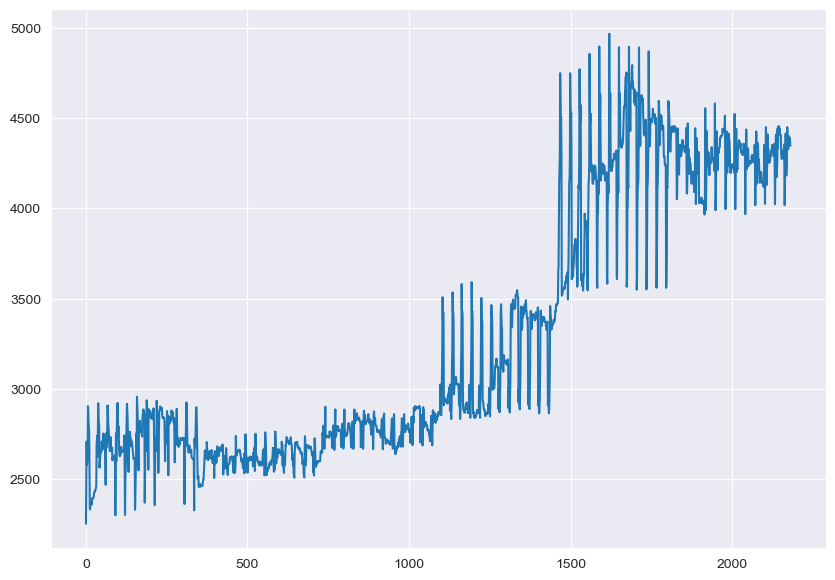

In [12]:
plt.plot(df['price'])
plt.rcParams['figure.figsize'] = (18,6)
plt.show()

# Checking Stationarity of the data

In [13]:
adfuller(df['price'])[1]

0.9240899189079191

Null hypothesis: Data is Non stationary

Alternate Hypothesis: Data is Stationary

If p< 0.05 ; Data is stationary

if p>0.05; Data is not stationary

According the p-value, the dataset is non-stationary as the p value is greater than alpha value.

# Visualization

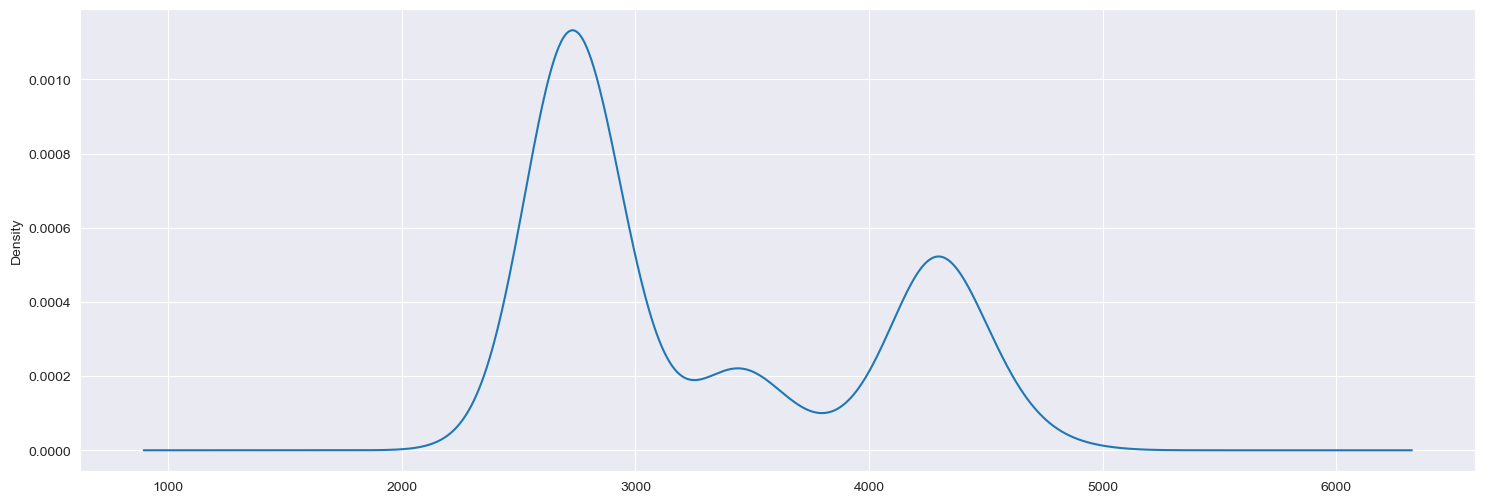

In [14]:
#kde plot
df['price'].plot(kind='kde')
plt.rcParams['figure.figsize'] = (12,4)

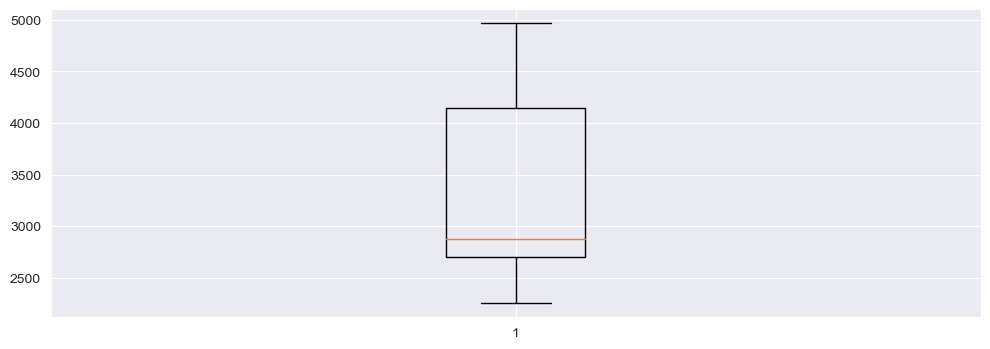

In [15]:
# boxplot to just confirm outliers present or not
plt.boxplot(df['price'])
plt.rcParams['figure.figsize'] = (10,7)

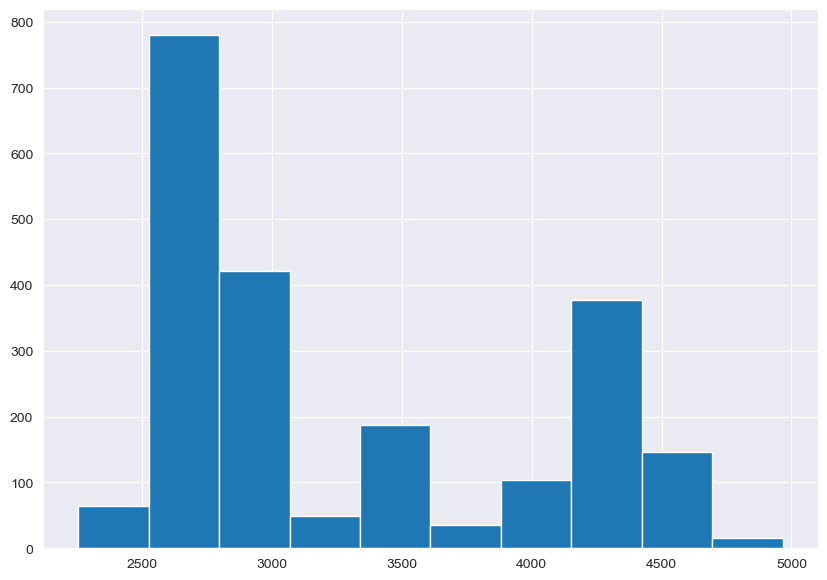

In [16]:
# histogram 
plt.hist(x=df['price'])
plt.rcParams['figure.figsize'] = (12,7)

In [17]:
from pandas.plotting import lag_plot


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

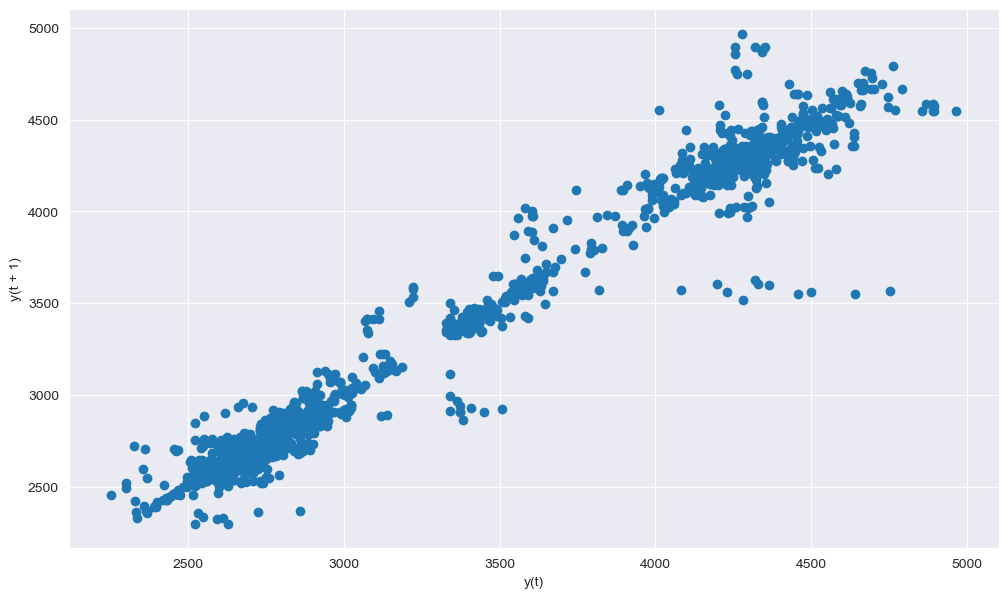

In [18]:
lag_plot(df['price'])

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from  statsmodels.tsa.stattools import acf,pacf

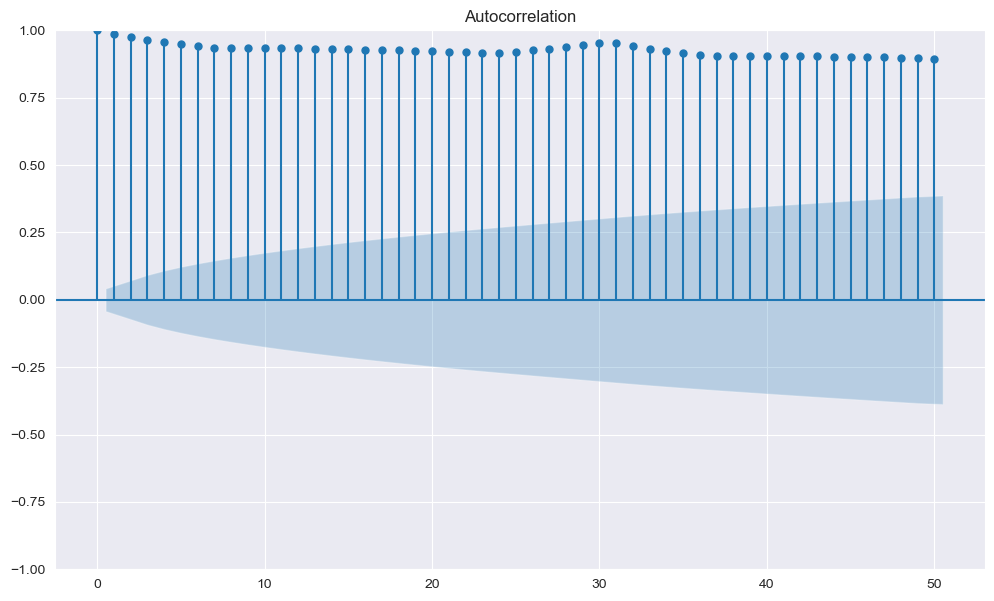

In [20]:
plot_acf(df['price'],lags=50)
plt.show()

In [21]:
# To remove stationarity of the data we are going to perfom [ first order Difference ]

In [22]:
df['first_order'] = df['price'].diff(periods=1)

In [23]:
df

,date,price,first_order
0,2016-01-01,2252.60,NaN
1,2016-01-02,2454.50,201.90
2,2016-01-03,2708.10,253.60
3,2016-01-04,2577.80,-130.30
4,2016-01-05,2597.75,19.95
...,...,...,...
2177,2021-12-17,4394.40,-5.40
2178,2021-12-18,4389.50,-4.90
2179,2021-12-19,4389.50,0.00
2180,2021-12-20,4354.10,-35.40


In [24]:
df.dropna(inplace=True)

In [25]:
df

,date,price,first_order
1,2016-01-02,2454.50,201.90
2,2016-01-03,2708.10,253.60
3,2016-01-04,2577.80,-130.30
4,2016-01-05,2597.75,19.95
5,2016-01-06,2617.70,19.95
...,...,...,...
2177,2021-12-17,4394.40,-5.40
2178,2021-12-18,4389.50,-4.90
2179,2021-12-19,4389.50,0.00
2180,2021-12-20,4354.10,-35.40


In [26]:
df.reset_index()

,index,date,price,first_order
0,1,2016-01-02,2454.50,201.90
1,2,2016-01-03,2708.10,253.60
2,3,2016-01-04,2577.80,-130.30
3,4,2016-01-05,2597.75,19.95
4,5,2016-01-06,2617.70,19.95
...,...,...,...,...
2176,2177,2021-12-17,4394.40,-5.40
2177,2178,2021-12-18,4389.50,-4.90
2178,2179,2021-12-19,4389.50,0.00
2179,2180,2021-12-20,4354.10,-35.40


In [27]:
if 'index' in df.columns:
    df.drop(columns='index', inplace=True)

In [28]:
df

,date,price,first_order
1,2016-01-02,2454.50,201.90
2,2016-01-03,2708.10,253.60
3,2016-01-04,2577.80,-130.30
4,2016-01-05,2597.75,19.95
5,2016-01-06,2617.70,19.95
...,...,...,...
2177,2021-12-17,4394.40,-5.40
2178,2021-12-18,4389.50,-4.90
2179,2021-12-19,4389.50,0.00
2180,2021-12-20,4354.10,-35.40


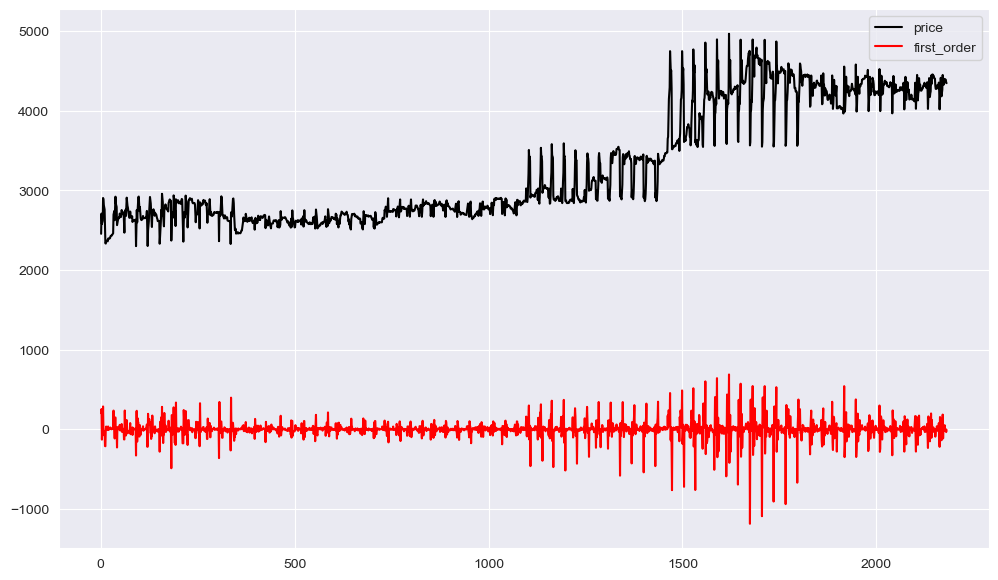

In [29]:
plt.plot(df['price'],color='black',label='price')
plt.plot(df['first_order'],color='red',label='first_order')
plt.legend()


##### In the red color line we can see that  Stationarity is not present

# Model Buliding


In [30]:
df['t'] = np.arange(0,2181)

In [31]:
df['t_squared'] = df['t']*df['t']
df['log_price'] = np.log(df['price'])

In [32]:
df

,date,price,first_order,t,t_squared,log_price
1,2016-01-02,2454.50,201.90,0,0,7.805678
2,2016-01-03,2708.10,253.60,1,1,7.904003
3,2016-01-04,2577.80,-130.30,2,4,7.854692
4,2016-01-05,2597.75,19.95,3,9,7.862401
5,2016-01-06,2617.70,19.95,4,16,7.870051
...,...,...,...,...,...,...
2177,2021-12-17,4394.40,-5.40,2176,4734976,8.388086
2178,2021-12-18,4389.50,-4.90,2177,4739329,8.386971
2179,2021-12-19,4389.50,0.00,2178,4743684,8.386971
2180,2021-12-20,4354.10,-35.40,2179,4748041,8.378873


In [33]:
# Speliting the data into train & test
train = df.head(2161)
test = df.tail(20)

In [34]:
train.shape

(2161, 6)

In [35]:
test.shape

(20, 6)

## ARIMA Model 

Finding with Auto Arima

In [36]:
order = auto_arima(df['price'])

In [37]:
order

ARIMA(order=(5, 1, 5), scoring_args={}, suppress_warnings=True)

In [38]:
arima_model = ARIMA(train['price'],order=(5,1,5)).fit()
import warnings
warnings.filterwarnings('ignore')

C:\Users\yashv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yashv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yashv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yashv\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\yashv\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check

In [39]:
test

,date,price,first_order,t,t_squared,log_price
2162,2021-12-02,4238.1,-115.1,2161,4669921,8.351870
2163,2021-12-03,4017.1,-221.0,2162,4674244,8.298316
2164,2021-12-04,4170.4,153.3,2163,4678569,8.335767
2165,2021-12-05,4305.5,135.1,2164,4682896,8.367649
2166,2021-12-06,4413.6,108.1,2165,4687225,8.392446
2167,2021-12-07,4319.4,-94.2,2166,4691556,8.370872
2168,2021-12-08,4181.5,-137.9,2167,4695889,8.338425
2169,2021-12-09,4219.4,37.9,2168,4700224,8.347448
2170,2021-12-10,4264.7,45.3,2169,4704561,8.358127
2171,2021-12-11,4448.9,184.2,2170,4708900,8.400412


In [42]:
ypred = arima_model.predict(start=2162,end=2181)
ypred

2162    4340.358850
2163    4319.096370
2164    4344.696791
2165    4327.454312
2166    4342.924120
2167    4309.268058
2168    4302.854950
2169    4341.647894
2170    4312.669048
2171    4317.706228
2172    4302.549311
2173    4304.839698
2174    4339.913727
2175    4298.686465
2176    4304.721385
2177    4310.382516
2178    4308.506055
2179    4331.656306
2180    4288.904186
2181    4303.764592
Name: predicted_mean, dtype: float64

In [43]:
print(np.sqrt(mean_squared_error(test['price'],ypred)))

105.98305523466387


In [44]:
# Here we have Worst model BCZ we are looking for a close value to RMSE

In [45]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [46]:
# linear Model

In [47]:
linear_model  = smf.ols('price~t',data=train,).fit()
pred_linear = pd.Series(linear_model.predict(test['t']))
rmse_lm = np.sqrt(mean_squared_error(test['price'],pred_linear))
rmse_lm

117.27683768362364

In [48]:
# Exponentional Model
exp_model = smf.ols('log_price~t',data=train,).fit()
pred_exp = pd.Series(exp_model.predict(test['t']))
rmse_exp = np.sqrt(mean_squared_error(test['price'],pred_exp))
rmse_exp

4303.490000242912

In [49]:
# Quadratic Model
quad_model = smf.ols('price~t+t_squared',data=train).fit()
pred_quad = quad_model.predict(test[["t", "t_squared"]])

rmse_quad = np.sqrt(mean_squared_error(test['price'],pred_quad))
rmse_quad

524.2324624998647

In [ ]:
df